## Import Libraries

In [157]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import xgboost, catboost
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

## Import dataset

In [158]:
data = pd.read_csv("car_price_data/car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data preprocessing

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [160]:
data.drop(columns = ["Car_Name"], inplace = True)

## EDA

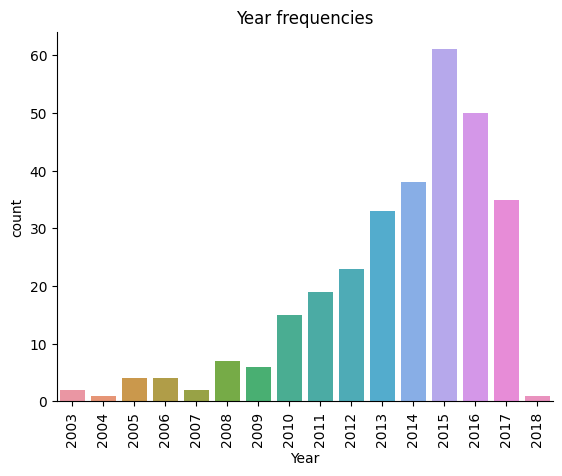

In [161]:
sns.countplot(x = "Year", data = data)
plt.xticks(rotation = 90)
sns.despine()
plt.title("Year frequencies");

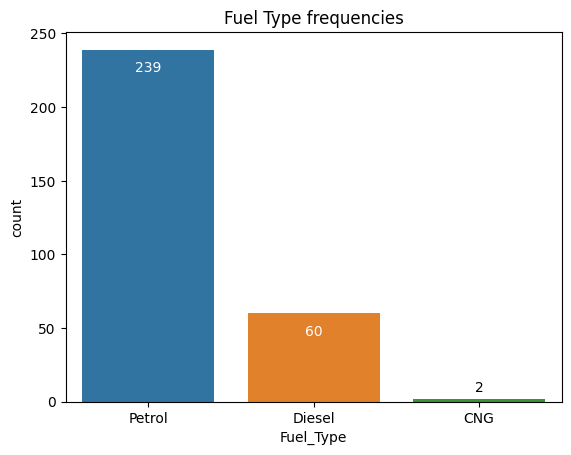

In [162]:
fuel_freq = data["Fuel_Type"].value_counts().reset_index()

sns.countplot(x = data["Fuel_Type"].map({
    "CNG": 2,
    "Diesel": 1,
    "Petrol": 0
}))
plt.xticks((2, 1, 0), ("CNG", "Diesel", "Petrol"));
for x, label, y in fuel_freq.itertuples():
    if y>50:
        plt.text(x, y - 15, y, ha = 'center', color = 'white')
    else:
        plt.text(x, y + 5, y, ha = 'center', color = 'black')

plt.title("Fuel Type frequencies");


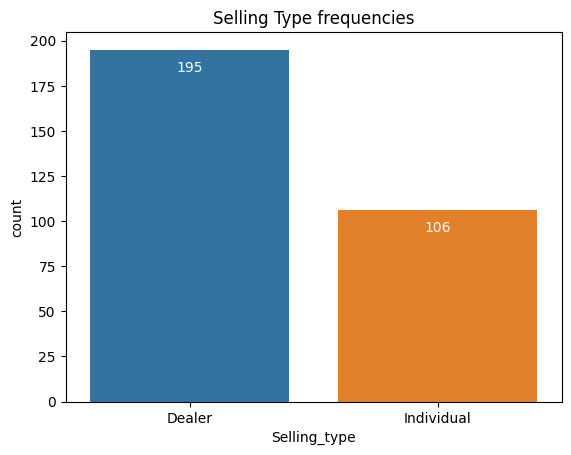

In [163]:
sell_type_freq = data["Selling_type"].value_counts().reset_index()

sns.countplot(x = data["Selling_type"].map({
    "Dealer": 0,
    "Individual": 1,
}))
plt.xticks((0, 1), ("Dealer", "Individual"))
for x, label, y in sell_type_freq.itertuples():
        plt.text(x, y - 12, y, ha = 'center', color = 'white')

plt.title("Selling Type frequencies");


In [164]:
data["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

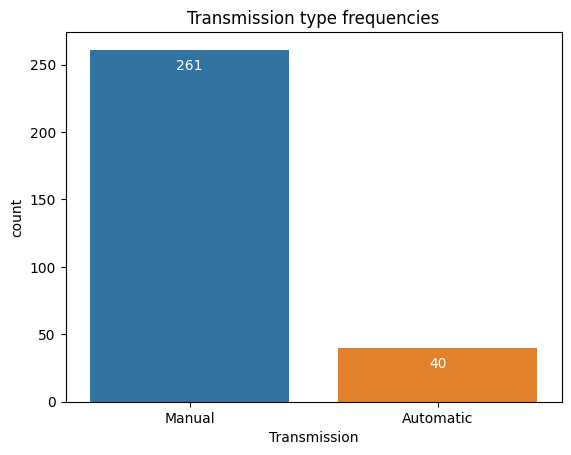

In [165]:
trans_type_freq = data["Transmission"].value_counts().reset_index()

sns.countplot(x = data["Transmission"].map({
    "Manual": 0,
    "Automatic": 1,
}))
plt.xticks((0, 1), ("Manual", "Automatic"))
for x, label, y in trans_type_freq.itertuples():
        plt.text(x, y - 15, y, ha = 'center', color = 'white')

plt.title("Transmission type frequencies");


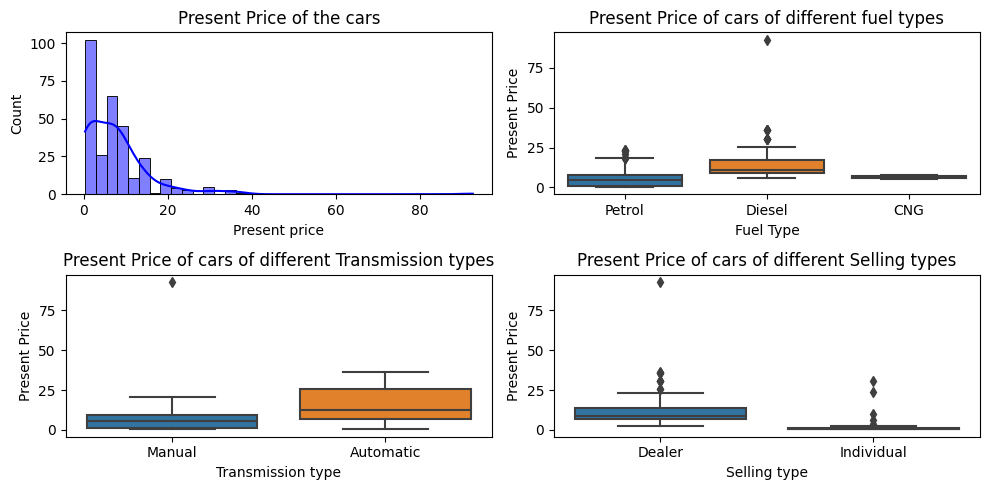

In [166]:
plt.figure(figsize = (10, 5))

plt.subplot(2, 2, 1)
sns.histplot(x = "Present_Price", data = data, kde = True, color = 'b')
plt.xlabel("Present price")
plt.title("Present Price of the cars");

plt.subplot(2, 2, 2)
sns.boxplot(x = "Fuel_Type", data = data, y = "Present_Price")
plt.xlabel("Fuel Type")
plt.ylabel("Present Price")
plt.title("Present Price of cars of different fuel types");

plt.subplot(2, 2, 3)
sns.boxplot(x = "Transmission", data = data, y = "Present_Price")
plt.xlabel("Transmission type")
plt.ylabel("Present Price")
plt.title("Present Price of cars of different Transmission types");

plt.subplot(2, 2, 4)
sns.boxplot(x = "Selling_type", data = data, y = "Present_Price")
plt.xlabel("Selling type")
plt.ylabel("Present Price")
plt.title("Present Price of cars of different Selling types");
plt.tight_layout()

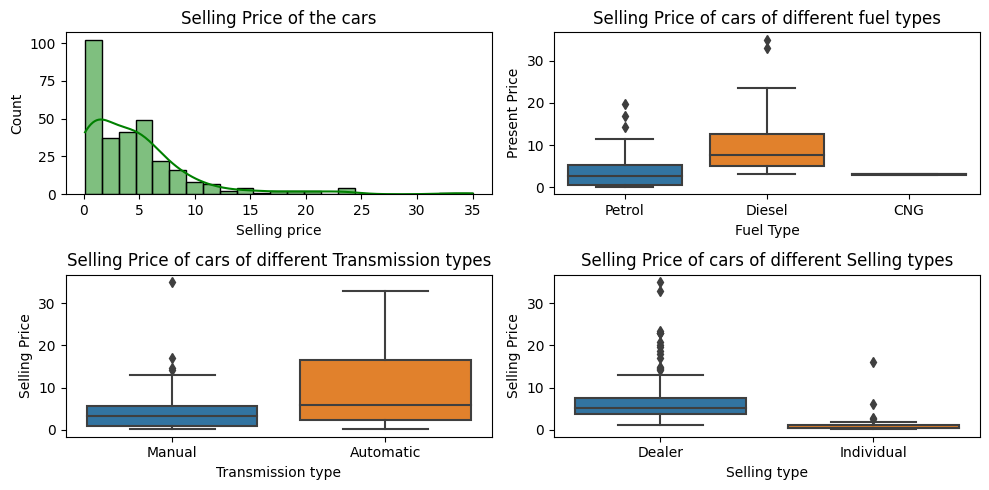

In [167]:
plt.figure(figsize = (10, 5))

plt.subplot(2, 2, 1)
sns.histplot(x = "Selling_Price", data = data, kde = True, color = 'g')
plt.xlabel("Selling price")
plt.title("Selling Price of the cars");

plt.subplot(2, 2, 2)
sns.boxplot(x = "Fuel_Type", data = data, y = "Selling_Price")
plt.xlabel("Fuel Type")
plt.ylabel("Present Price")
plt.title("Selling Price of cars of different fuel types");

plt.subplot(2, 2, 3)
sns.boxplot(x = "Transmission", data = data, y = "Selling_Price")
plt.xlabel("Transmission type")
plt.ylabel("Selling Price")
plt.title("Selling Price of cars of different Transmission types");

plt.subplot(2, 2, 4)
sns.boxplot(x = "Selling_type", data = data, y = "Selling_Price")
plt.xlabel("Selling type")
plt.ylabel("Selling Price")
plt.title("Selling Price of cars of different Selling types");
plt.tight_layout()

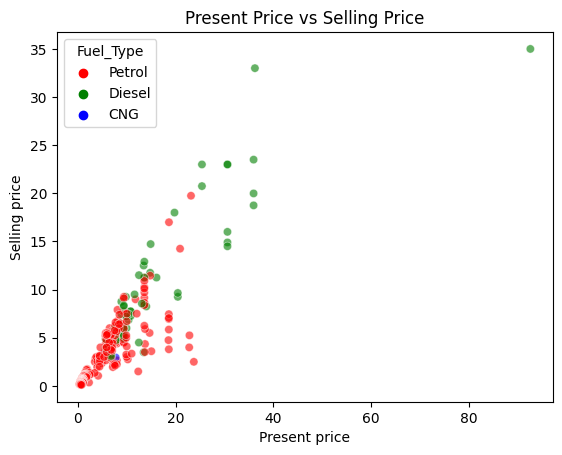

In [168]:
sns.scatterplot(y = "Selling_Price", x = "Present_Price", data = data, palette = ["r", "g", "b"], hue = 'Fuel_Type', alpha = 0.6)
plt.ylabel("Selling price")
plt.xlabel("Present price")
plt.title("Present Price vs Selling Price");

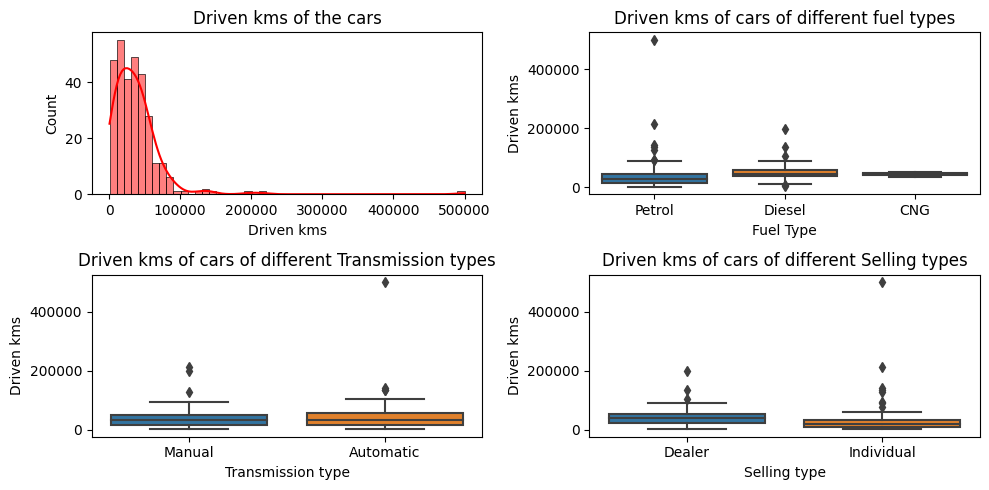

In [169]:
plt.figure(figsize = (10, 5))

plt.subplot(2, 2, 1)
sns.histplot(x = "Driven_kms", data = data, kde = True, color = 'r')
plt.xlabel("Driven kms")
plt.title("Driven kms of the cars");

plt.subplot(2, 2, 2)
sns.boxplot(x = "Fuel_Type", data = data, y = "Driven_kms")
plt.xlabel("Fuel Type")
plt.ylabel("Driven kms")
plt.title("Driven kms of cars of different fuel types");

plt.subplot(2, 2, 3)
sns.boxplot(x = "Transmission", data = data, y = "Driven_kms")
plt.xlabel("Transmission type")
plt.ylabel("Driven kms")
plt.title("Driven kms of cars of different Transmission types");

plt.subplot(2, 2, 4)
sns.boxplot(x = "Selling_type", data = data, y = "Driven_kms")
plt.xlabel("Selling type")
plt.ylabel("Driven kms")
plt.title("Driven kms of cars of different Selling types");
plt.tight_layout()

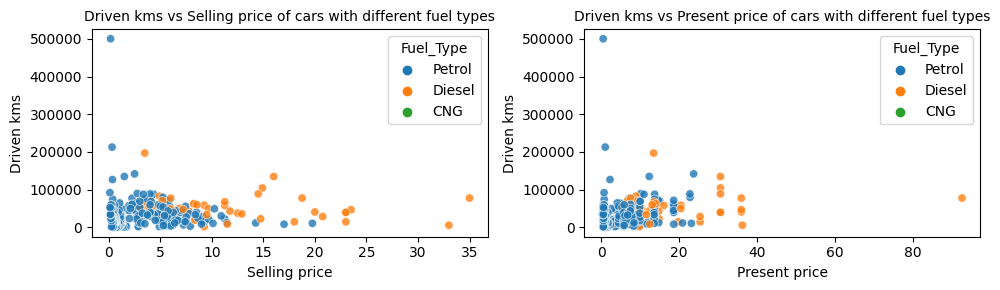

In [170]:
plt.figure(figsize = (10, 3))

plt.subplot(1, 2, 1)
sns.scatterplot(y = "Driven_kms", x = "Selling_Price", data = data, hue = "Fuel_Type", alpha = 0.8)
plt.xlabel("Selling price")
plt.ylabel("Driven kms")
plt.title("Driven kms vs Selling price of cars with different fuel types", fontsize = 10)

plt.subplot(1, 2, 2)
sns.scatterplot(y = "Driven_kms", x = "Present_Price", data = data, hue = "Fuel_Type", alpha = 0.8)
plt.xlabel("Present price")
plt.ylabel("Driven kms")
plt.title("Driven kms vs Present price of cars with different fuel types", fontsize = 10)
plt.tight_layout()

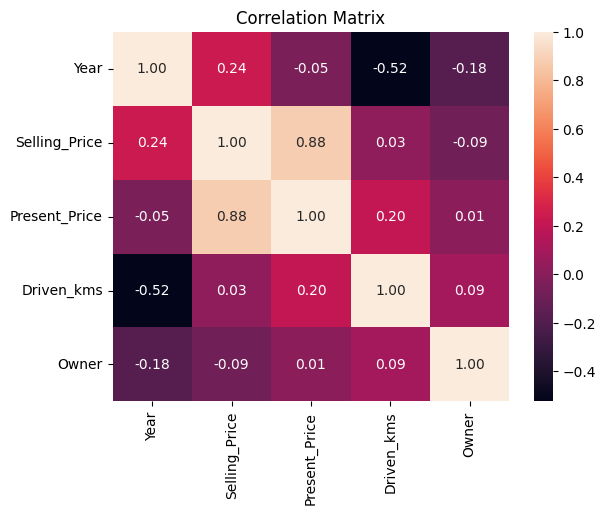

In [171]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt = '.2f')
plt.title("Correlation Matrix");

## Train test split

In [172]:
X = data.drop(columns = ["Selling_Price"]).values
y = data["Selling_Price"].values

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [174]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (240, 7)
y_train shape: (240,)
X_test shape: (61, 7)
y_test shape: (61,)


### One Hot Encoding the categorical variables

In [175]:
one_hot = OneHotEncoder(drop = 'first')
col_transformer = ColumnTransformer(transformers = [('one_hot_encoder', one_hot, [-4, -3, -2])], remainder = 'passthrough')

X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

## Modelling Experiments

### Custom function to evaluate model performances

In [176]:
def get_model_performance(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return{
        'r2_score': np.round(r2_score(y_test, y_pred), 2),
        'adjusted_r2_score': np.round((1 - (((1 - r2_score(y_test, y_pred)) * (X_test.shape[0] - 1))/(X_test.shape[0] - X_test.shape[1] - 1))), 2),
        'mae' : np.round(mean_absolute_error(y_test, y_pred), 2),
        'mse' : np.round(mean_squared_error(y_test, y_pred), 2),
        'rmse' : np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
        'mape' : np.round(mean_absolute_percentage_error(y_test, y_pred), 2),
    }

### Model1: Linear Regression

In [177]:
lin_reg = LinearRegression(n_jobs = -1)
get_model_performance(lin_reg)

{'r2_score': 0.86,
 'adjusted_r2_score': 0.84,
 'mae': 1.11,
 'mse': 3.0,
 'rmse': 1.73,
 'mape': 1.27}

### Model2: KNearest neighbors regressor

#### Finding optimal k value

In [178]:
error_rate = []
for k in range(1, X_train.shape[0] + 1):
    knn = KNeighborsRegressor(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(1 - r2_score(y_test, predictions))

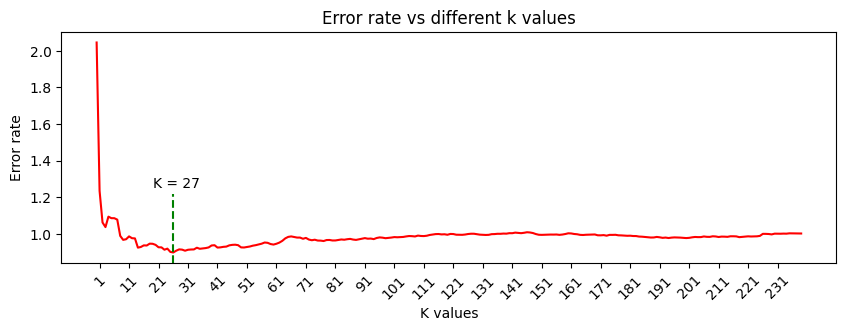

In [179]:
plt.figure(figsize = (10, 3))
sns.lineplot(error_rate, color = 'red')
plt.xlabel("K values")
plt.ylabel("Error rate")
plt.xticks(np.arange(1, X_train.shape[0], 10), rotation = 45)
plt.title("Error rate vs different k values");
plt.axvline(x = np.argmin(error_rate), color = 'g', linestyle = '--', ymin = 0, ymax = 0.3)
plt.text(x = np.argmin(error_rate) - 7, y = 1.25, s = f"K = {np.argmin(error_rate) + 1}");    #+1 because index starts from 0

- Fitting the model with optimal k value (`27`)

In [180]:
knn = KNeighborsRegressor(n_neighbors = 27)
get_model_performance(knn)

{'r2_score': 0.1,
 'adjusted_r2_score': -0.04,
 'mae': 3.13,
 'mse': 19.47,
 'rmse': 4.41,
 'mape': 4.04}

- The reason behind the bad performance is the data is not in the same scale, so we need feature scaling for any distance based algorthms.
- Lets apply `min-max` scaling

- Lets follow the same steps
   - Find optimal k value
   - Fit the model with the optimal k value
   - Get model performance

In [181]:
scaler= MinMaxScaler()
X_train[:, [-2, -3, -4]] = scaler.fit_transform(X_train[:, [-2, -3, -4]])
X_test[:, [-2, -3, -4]] = scaler.transform(X_test[:, [-2, -3, -4]])

In [182]:
error_rate = []
for k in range(1, X_train.shape[0] + 1):
    knn = KNeighborsRegressor(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(1 - r2_score(y_test, predictions))

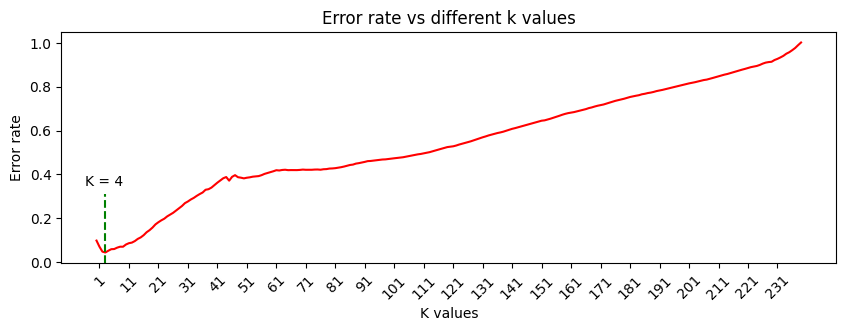

In [183]:
plt.figure(figsize = (10, 3))
sns.lineplot(error_rate, color = 'red')
plt.xlabel("K values")
plt.ylabel("Error rate")
plt.xticks(np.arange(1, X_train.shape[0], 10), rotation = 45)
plt.title("Error rate vs different k values");
plt.axvline(x = np.argmin(error_rate), color = 'g', linestyle = '--', ymin = 0, ymax = 0.3)
plt.text(x = np.argmin(error_rate) - 7, y = 0.35, s = f"K = {np.argmin(error_rate) + 1}");    #+1 because index starts from 0

In [184]:
knn = KNeighborsRegressor(n_neighbors=4, n_jobs=-1)
get_model_performance(knn)

{'r2_score': 0.96,
 'adjusted_r2_score': 0.95,
 'mae': 0.62,
 'mse': 0.95,
 'rmse': 0.98,
 'mape': 0.4}

- Look at that, how much the model performance got increased !

### Model3: Decision tree regressor

In [199]:
dtree = DecisionTreeRegressor(random_state=1)
get_model_performance(dtree)

{'r2_score': 0.96,
 'adjusted_r2_score': 0.95,
 'mae': 0.6,
 'mse': 0.91,
 'rmse': 0.96,
 'mape': 0.17}

### Model4: Random Forest regressor

In [201]:
rdf = RandomForestRegressor(random_state=42)
get_model_performance(rdf)

{'r2_score': 0.91,
 'adjusted_r2_score': 0.89,
 'mae': 0.68,
 'mse': 2.01,
 'rmse': 1.42,
 'mape': 0.21}

### Model5: XGBoost

In [193]:
xgb = xgboost.XGBRegressor()
get_model_performance(xgb)

{'r2_score': 0.9,
 'adjusted_r2_score': 0.88,
 'mae': 0.65,
 'mse': 2.2,
 'rmse': 1.48,
 'mape': 0.18}

### Model6: CatBoost

In [197]:
ctb = catboost.CatBoostRegressor(random_state=1, verbose=0)
get_model_performance(ctb)

{'r2_score': 0.97,
 'adjusted_r2_score': 0.96,
 'mae': 0.56,
 'mse': 0.67,
 'rmse': 0.82,
 'mape': 0.31}

### **Conclusion:**  `CatBoost` performing best!

##